In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
import pandas as pd
from pandas import DataFrame, Series
import matplotlib

In [3]:
%matplotlib inline

In [4]:
matplotlib.rcParams["font.size"] = 16

In [5]:
s = Series([0, 100, 300, 200, 400], index=[0, 1, 20, 21, 22])
s

0       0
1     100
20    300
21    200
22    400
dtype: int64

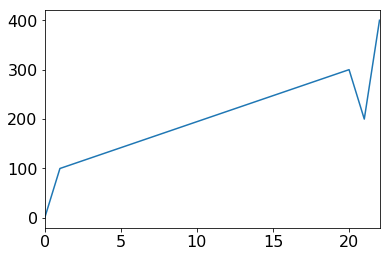

In [6]:
s.plot.line()

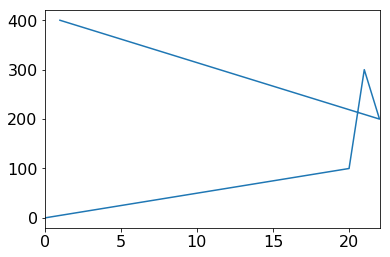

In [7]:
s = Series([0, 100, 300, 200, 400], index=[0, 20, 21, 22, 1])
s.plot.line()

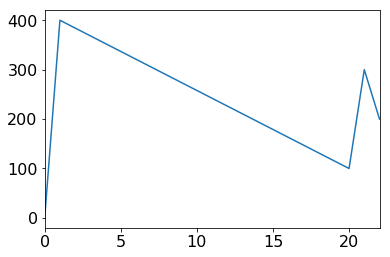

In [8]:
s.sort_index().plot.line()

In [9]:
df = DataFrame({
    "high": [26, 31, 43, 57, 68, 78, 82, 79, 72, 59, 44, 30],
    "low": [11, 15, 25, 36, 46, 56, 61, 59, 50, 39, 28, 16]
})
df

,high,low
0,26,11
1,31,15
2,43,25
3,57,36
4,68,46
5,78,56
6,82,61
7,79,59
8,72,50
9,59,39


Text(0, 0.5, 'Temp (Fehrenheit)')

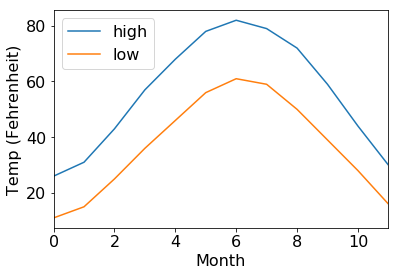

In [10]:
ax = df.plot.line()
ax.set_xlabel("Month")
ax.set_ylabel("Temp (Fehrenheit)")

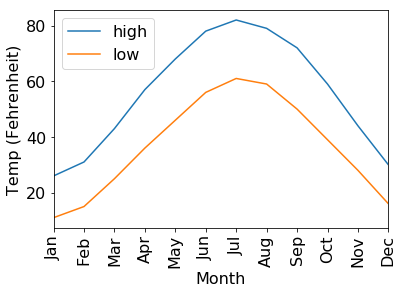

In [11]:
ax = df.plot.line() # OPT 1: make it wider with figsize
ax.set_xlabel("Month")
ax.set_ylabel("Temp (Fehrenheit)")
ax.set_xticklabels(["Jan", "Feb", "Mar", "Apr", "May", "Jun",
                    "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"], rotation=90)
ax.set_xticks(range(12))
None

In [12]:
celcius = (df - 32) / (212-32) * 100
celcius.head()

,high,low
0,-3.333333,-11.666667
1,-0.555556,-9.444444
2,6.111111,-3.888889
3,13.888889,2.222222
4,20.000000,7.777778


In [13]:
celcius["freezing"] = 0
celcius

,high,low,freezing
0,-3.333333,-11.666667,0
1,-0.555556,-9.444444,0
2,6.111111,-3.888889,0
3,13.888889,2.222222,0
4,20.000000,7.777778,0
5,25.555556,13.333333,0
6,27.777778,16.111111,0
7,26.111111,15.000000,0
8,22.222222,10.000000,0
9,15.000000,3.888889,0


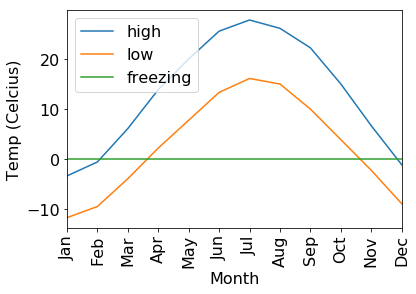

In [14]:
ax = celcius.plot.line()
ax.set_xlabel("Month")
ax.set_ylabel("Temp (Celcius)")
ax.set_xticklabels(["Jan", "Feb", "Mar", "Apr", "May", "Jun",
                    "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"], rotation=90)
ax.set_xticks(range(12))
None

# Stock Market Example

In [15]:
df = pd.read_csv("sp500.csv")
df.head()

,year,return
0,1970,1.0401
1,1971,1.1431
2,1972,1.1898
3,1973,0.8534
4,1974,0.7353


In [16]:
starting = 1000
df["tot"] = df["return"].cumprod()
df["wealth"] = df["tot"] * starting
df.set_index("year").tail()

,return,tot,wealth
year,,,
2014,1.1369,88.439335,88439.334579
2015,1.0138,89.659797,89659.797397
2016,1.1196,100.383109,100383.109165
2017,1.2183,122.296742,122296.741896
2018,0.9557,116.878996,116878.996230


Text(0, 0.5, 'Wealth ($)')

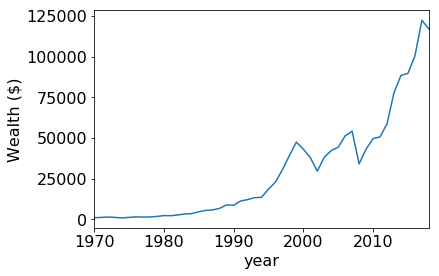

In [20]:
ax = df.set_index("year")["wealth"].plot.line()
ax.set_ylabel("Wealth ($)")

In [21]:
# how risk is investing in SP500 index going forward
# approach:
# 1. run sim, randomly replaying past years
# 2. run hundreds of sims, explore range of outcomes

In [22]:
import random

In [36]:
random.choice([3, 4, 9])

4

In [42]:
random.choices([3, 4, 9], k=10)

[4, 4, 3, 9, 4, 9, 3, 3, 9, 3]

In [109]:
def run_sim(years=10, starting=1000):
    rand_returns = random.choices(df["return"], k=years)
    rand_returns = Series(rand_returns)
    return rand_returns.cumprod() * starting

def run_n_sims(n, years=10, starting=1000):
    sims = pd.DataFrame()
    for i in range(n):
        sims["sim"+str(i)] = run_sim(years=years, starting=starting)
    return sims

sims = run_n_sims(250)
sims.tail()

,sim0,sim1,sim2,sim3,sim4,sim5,sim6,sim7,sim8,sim9,...,sim240,sim241,sim242,sim243,sim244,sim245,sim246,sim247,sim248,sim249
5,1941.714511,3288.442479,1194.203766,1575.437544,2024.749676,2710.220648,1897.028061,1654.048897,2104.859827,3192.058152,...,2691.492354,3474.198429,1348.205582,2494.565435,2341.217506,1870.553741,1488.583789,2062.142576,2645.995887,1458.205888
6,2664.032310,3980.330776,1157.183449,1874.455590,2151.701481,2843.292482,1923.207048,1676.874772,2497.837156,3780.673675,...,2860.248925,3520.057848,1759.003823,2527.493699,2785.580588,2059.105558,1422.639527,2506.534301,2775.914285,1244.432905
7,3169.665642,5273.938278,1051.879755,2220.105201,2807.324922,3298.219279,2049.369431,1986.090480,2749.619142,4477.829900,...,3767.805909,3941.056767,1893.039915,2226.974698,2454.375056,2102.552685,1658.939953,2968.739226,3155.936950,1261.606079
8,3623.244795,7255.884283,1293.391347,1894.637778,3090.303274,3471.375792,2819.522463,2257.986267,2627.811014,5221.597447,...,5024.745960,5422.105900,2011.733517,2117.407543,2506.162370,2037.373552,2164.418956,2755.583750,3197.595318,1451.603954
9,2822.507696,6393.159642,1590.354000,1994.106262,3764.916478,3689.031054,3491.696618,2052.509516,3461.615448,5290.522533,...,6619.097853,6856.795121,1922.613723,2507.857494,3071.552601,2699.519956,2068.535197,2146.599741,4399.251639,1784.892222


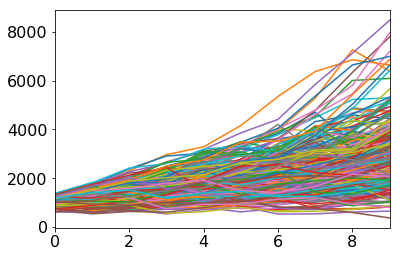

In [110]:
# DS = detective + teacher

# THIS ONE IS THE DETECTIVE VERSION
sims.plot.line(legend=False)

In [111]:
sims

,sim0,sim1,sim2,sim3,sim4,sim5,sim6,sim7,sim8,sim9,...,sim240,sim241,sim242,sim243,sim244,sim245,sim246,sim247,sim248,sim249
0,1166.100000,1076.200000,950.800000,1238.400000,1052.500000,1317.300000,1157.900000,1136.900000,1100.800000,1040.100000,...,1100.800000,1189.800000,1285.800000,1238.400000,1264.600000,1013.200000,1215.500000,1157.900000,1150.600000,1189.800000
1,1129.950900,1383.777960,837.749880,1407.936960,1393.404750,1695.101640,1296.384840,835.962570,1309.731840,1378.132500,...,1468.026880,1567.323540,1693.784340,1183.538880,1686.470560,1068.824680,1494.578800,1350.227190,1515.225140,1409.199120
2,1175.261931,1713.670626,871.343650,1338.666462,1350.209203,2099.213871,1501.084006,879.850605,1724.785860,1575.343261,...,1799.213744,1940.973472,1245.439625,1496.703268,2006.562672,1470.488995,1573.044187,1227.356516,1876.454813,1516.580093
3,1512.327053,2357.668047,882.845386,1422.600849,1787.541964,1948.490315,1599.555117,1131.311908,2000.751598,1930.740700,...,1980.574490,2495.703690,1640.617618,1556.721069,1563.112322,1490.781743,1798.146810,1509.157572,2019.440670,1181.415892
4,2003.833345,2390.203866,1029.486005,1293.144171,1923.752661,1975.379481,1453.995601,1202.245164,1912.118302,2482.546393,...,2196.060994,2747.270622,1730.687526,1884.255182,1851.350234,1846.184110,1910.890615,1603.781751,2151.915978,1401.986240
5,1941.714511,3288.442479,1194.203766,1575.437544,2024.749676,2710.220648,1897.028061,1654.048897,2104.859827,3192.058152,...,2691.492354,3474.198429,1348.205582,2494.565435,2341.217506,1870.553741,1488.583789,2062.142576,2645.995887,1458.205888
6,2664.032310,3980.330776,1157.183449,1874.455590,2151.701481,2843.292482,1923.207048,1676.874772,2497.837156,3780.673675,...,2860.248925,3520.057848,1759.003823,2527.493699,2785.580588,2059.105558,1422.639527,2506.534301,2775.914285,1244.432905
7,3169.665642,5273.938278,1051.879755,2220.105201,2807.324922,3298.219279,2049.369431,1986.090480,2749.619142,4477.829900,...,3767.805909,3941.056767,1893.039915,2226.974698,2454.375056,2102.552685,1658.939953,2968.739226,3155.936950,1261.606079
8,3623.244795,7255.884283,1293.391347,1894.637778,3090.303274,3471.375792,2819.522463,2257.986267,2627.811014,5221.597447,...,5024.745960,5422.105900,2011.733517,2117.407543,2506.162370,2037.373552,2164.418956,2755.583750,3197.595318,1451.603954
9,2822.507696,6393.159642,1590.354000,1994.106262,3764.916478,3689.031054,3491.696618,2052.509516,3461.615448,5290.522533,...,6619.097853,6856.795121,1922.613723,2507.857494,3071.552601,2699.519956,2068.535197,2146.599741,4399.251639,1784.892222


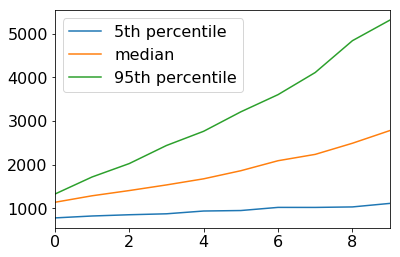

In [114]:
# TEACHER PLOT

# .quantile function gives percentiles
DataFrame({
    "5th percentile": sims.quantile(0.05, axis=1),
    "median": sims.quantile(0.5, axis=1),
    "95th percentile": sims.quantile(0.95, axis=1),
}).plot.line()

# Bar Plot Example w/ Fire Hydrants

In [116]:
df = pd.read_csv("Fire_Hydrants.csv")
df.columns

Index(['X', 'Y', 'OBJECTID', 'CreatedBy', 'CreatedDate', 'LastEditor',
       'LastUpdate', 'FacilityID', 'DataSource', 'ProjectNumber',
       'InstallDate', 'LifecycleStatus', 'Location', 'SymbolRotation',
       'HydrantType', 'Elevation', 'Manufacturer', 'Style',
       'year_manufactured', 'BarrelDiameter', 'SeatDiameter', 'Comments',
       'nozzle_color', 'MaintainedBy', 'InstallType'],
      dtype='object')

In [117]:
df.head()

,X,Y,OBJECTID,CreatedBy,CreatedDate,LastEditor,LastUpdate,FacilityID,DataSource,ProjectNumber,...,Elevation,Manufacturer,Style,year_manufactured,BarrelDiameter,SeatDiameter,Comments,nozzle_color,MaintainedBy,InstallType
0,-89.519573,43.049308,2536,NaN,NaN,WUJAG,2018-06-07T19:45:53.000Z,HYDR-2360-2,FASB,NaN,...,1138.0,NaN,Pacer,1996.0,5.0,NaN,NaN,blue,MADISON WATER UTILITY,NaN
1,-89.521988,43.049193,2537,NaN,NaN,WUJAG,2018-06-07T19:45:53.000Z,HYDR-2360-4,FASB,NaN,...,1170.0,NaN,Pacer,1995.0,5.0,NaN,NaN,blue,MADISON WATER UTILITY,NaN
2,-89.522093,43.048233,2538,NaN,NaN,WUJAG,2018-06-07T19:45:53.000Z,HYDR-2361-19,FASB,NaN,...,1179.0,NaN,Pacer,1996.0,5.0,NaN,NaN,blue,MADISON WATER UTILITY,NaN
3,-89.521013,43.049033,2539,NaN,NaN,WUJAG,2018-06-07T19:45:53.000Z,HYDR-2360-3,FASB,NaN,...,1163.0,NaN,Pacer,1995.0,5.0,NaN,NaN,blue,MADISON WATER UTILITY,NaN
4,-89.524782,43.056263,2540,NaN,NaN,WUPTB,2017-08-31T16:19:46.000Z,HYDR-2257-5,NaN,NaN,...,1065.0,NaN,Pacer,1996.0,5.0,NaN,NaN,blue,MADISON WATER UTILITY,NaN


In [143]:
orig_colors = df["nozzle_color"]
orig_colors = orig_colors.str.upper()
orig_colors.head(2)

0    BLUE
1    BLUE
Name: nozzle_color, dtype: object

In [144]:
color_counts = orig_colors.value_counts() # in SQL, it's like GROUP BY with COUNT(*)
color_counts.head(3)

BLUE      7003
GREEN      330
ORANGE      79
Name: nozzle_color, dtype: int64

Text(0, 0.5, 'Hydrant Count')

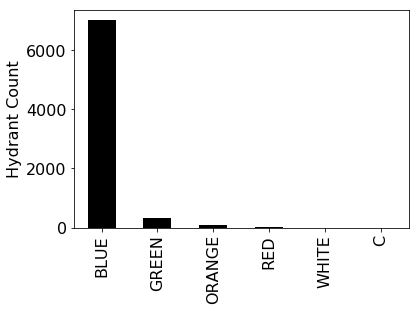

In [142]:
ax = color_counts.plot.bar(color="k")
ax.set_ylabel("Hydrant Count")

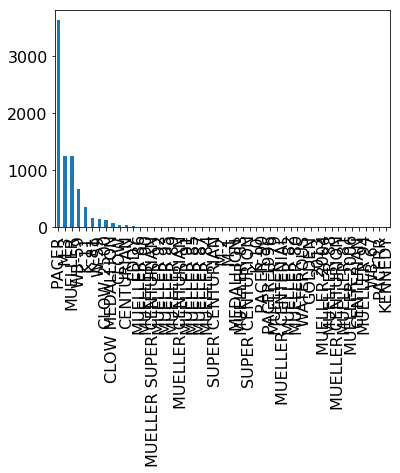

In [151]:
counts = df["Style"].str.upper().value_counts()
counts.plot.bar()

Text(0.5, 0, 'Hydrant Count')

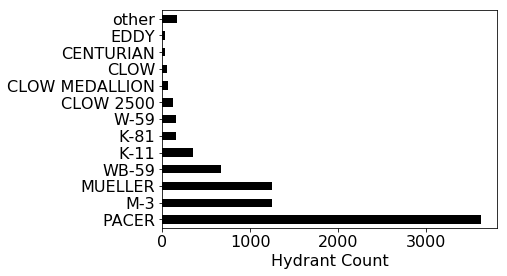

In [163]:
counts = df["Style"].str.upper().value_counts()
top12 = counts.iloc[:12]
top12["other"] = counts.iloc[12:].sum()
ax = top12.plot.barh(color="k")
ax.set_xlabel("Hydrant Count")

In [ ]:
# NEXT: when were these installed?